# Titanic - EDA, Modeling

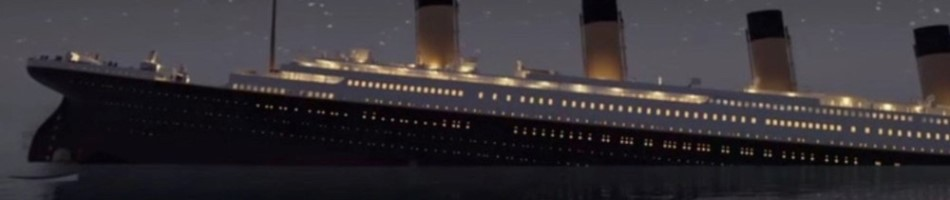

**The Challenge:**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

####  Import Liabrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

 **Data Dictionary:**
 
    Variable	Definition	Key
    survival	Survival	0 = No, 1 = Yes
    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	Sex	
    Age	Age in years	
    sibsp	# of siblings / spouses aboard the Titanic	
    parch	# of parents / children aboard the Titanic	
    ticket	Ticket number	
    fare	Passenger fare	
    cabin	Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
    -----------------------------------------------------------------------------------
    Variable Notes:
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)
    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

#### Data Import

In [2]:
# Importing Data

df= pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Checking Data

In [3]:
# df shape
df.shape

(891, 12)

In [4]:
# Checking basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Observation: null values in train dataset

In [5]:
# describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking Duplicate

df_copy = df.copy()
df_copy.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool>

- No Duplicate values found

In [7]:
# Null values in dataset

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Calculating Null values % 

df.isna().sum()*100/len(df)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- Cabin Column having very high null values, so need to delete.
- Age and Embarked can be filled through the mean, mode respectivly

In [9]:
df.drop(['Cabin'], axis=1, inplace=True)

In [10]:
# Filling Null 'Age'
df['Age'].interpolate(method='linear', inplace=True)

In [11]:
# Filling Null 'Embarked'
df['Embarked'] = df['Embarked'].fillna(method='ffill')

In [12]:
# Ckecking Null values
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- No null values in the dataset

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## EDA

#### Survival Rate

In [14]:
df['Survived'].value_counts()/len(df)*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

- Survival Rate is 38.38%

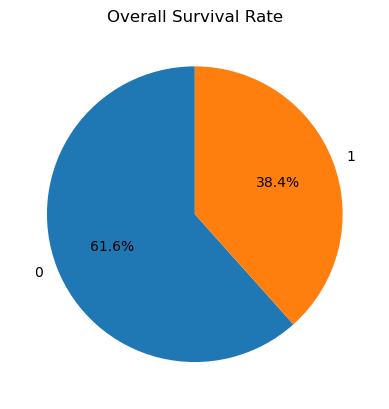

In [15]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle= 90 )
plt.title('Overall Survival Rate')
plt.ylabel('')
plt.show()

#### Gender

In [16]:
# Gender Count
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

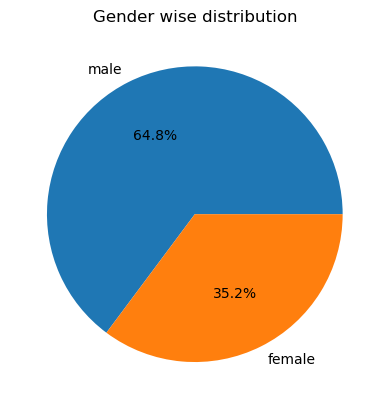

In [17]:
round(df['Sex'].value_counts()/len(df)*100,1).plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Gender wise distribution')
plt.show()

In [18]:
#### Genderwise Survived Rate

df.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [19]:
gender_survival_rate_percentage = df.groupby('Sex')['Survived'].mean() * 100
print(gender_survival_rate_percentage)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [20]:
# Genderwise Survived Rate
Gender_Survived = pd.crosstab(df['Sex'], df['Survived'])
Gender_Survived['Survived_Percentage'] = round (Gender_Survived[1]/(Gender_Survived[0]+Gender_Survived[1])*100,2)
Gender_Survived

Survived,0,1,Survived_Percentage
Sex,,,
female,81,233,74.20
male,468,109,18.89


- Female Survived percentage is higher than male.

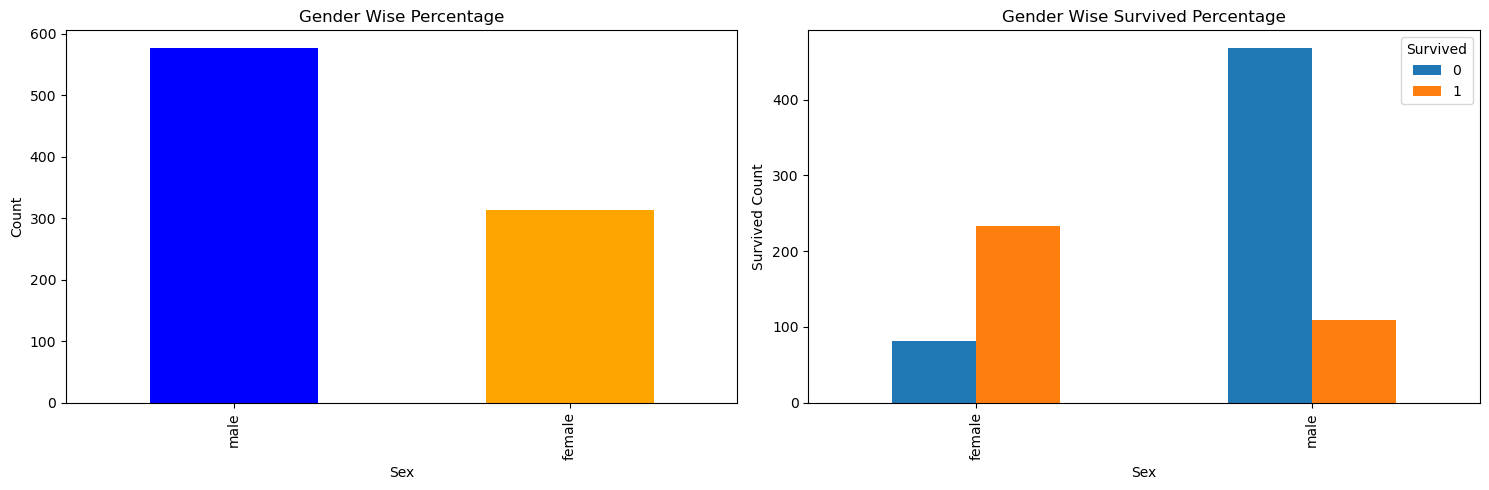

In [21]:
# Gender wise count
plt.figure (figsize= (15,5))
plt.subplot(1,2,1)
df.Sex.value_counts().plot.bar(color=['Blue','Orange'])
plt.ylabel('Count')
plt.title('Gender Wise Percentage')

# Gender_Survived
plt.subplot(1,2,2)
ax=plt.gca()
df.pivot_table (columns='Survived', index='Sex', values= 'PassengerId', aggfunc='count').plot.bar(ax=ax)
plt.ylabel('Survived Count')
plt.title('Gender Wise Survived Percentage')
plt.tight_layout() 
plt.show()

-  Females are Survived higher in numbers, although male passanger was higher in number, So we can assume that saving life of womens were priority.

#### Age

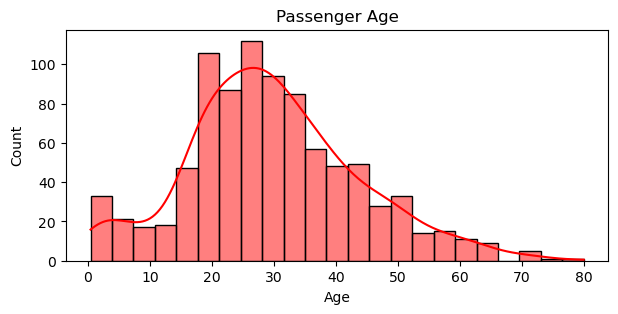

In [22]:
# Passenger Age > Histogram
plt.figure(figsize=(7,3))
sns.histplot(data=df, x='Age', kde=True, color='red')
plt.title('Passenger Age')
plt.show()

- Majority of passenger age was between 20 to 40

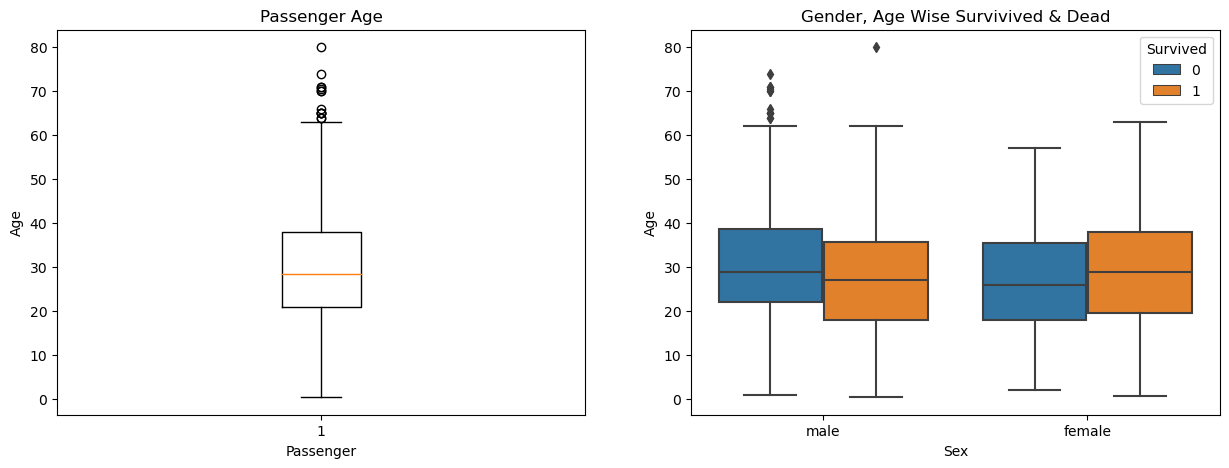

In [23]:
# Gender, Age Wise Survivived & Dead

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot( df['Age'])
plt.title('Passenger Age')
plt.xlabel('Passenger')
plt.ylabel('Age')

plt.subplot(1,2,2)
sns.boxplot (data=df, x= 'Sex', y='Age', hue='Survived')
plt.title ('Gender, Age Wise Survivived & Dead')
plt.show()

- From above plot it seems that at the time of rescueing passenger age was not that priority, Because Survived and Not survived box plots are nearly similar.
- At first glance to looking second plot we see that in male dead passenger categoty there are otlier present beyong 65 age, but they not present in suurvived male category, it means most of above 65 age passenger not survived.

# -------------------------------------------------------------------------

In [24]:
# Count of values
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [25]:
# passenger with their siblings, spouse count
df_sibsp= pd.crosstab (df['SibSp'], df['Survived'])
df_sibsp.columns = ['Dead', 'Survived']
df_sibsp['Survived_Percentage'] = round(df_sibsp['Survived']/(df_sibsp['Dead']+df_sibsp['Survived'])*100,2)
df_sibsp

,Dead,Survived,Survived_Percentage
SibSp,,,
0,398,210,34.54
1,97,112,53.59
2,15,13,46.43
3,12,4,25.00
4,15,3,16.67
5,5,0,0.00
8,7,0,0.00


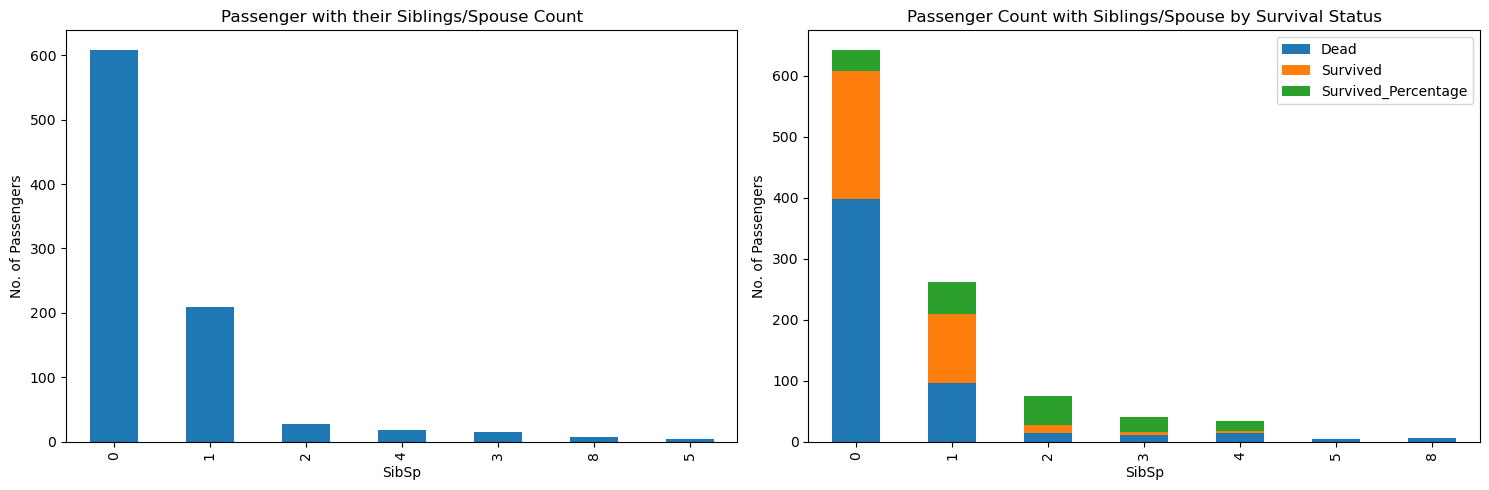

In [26]:
# Finding How many passenger with their siblings, spouse

# Create the figure and subplots
plt.figure(figsize=(15, 5))

# First subplot: SibSp value counts
plt.subplot(1, 2, 1)
df.SibSp.value_counts().plot.bar()
plt.ylabel('No. of Passengers')
plt.title('Passenger with their Siblings/Spouse Count')

# Second subplot: Stacked bar chart with survival status
plt.subplot(1, 2, 2)
df_sibsp.plot(kind='bar', stacked=True, ax=plt.gca()) 
plt.ylabel('No. of Passengers')
plt.title('Passenger Count with Siblings/Spouse by Survival Status')

plt.tight_layout()
plt.show()

- Passenger with 1 or 2 siblings/spouse survived rate is more than other type, with the help of each other passenger survived compare to those who were alone, but those passenger had more family member(>3), It is possible that they took longer to save each other's lives and were unable to save every member.    

# ---------------------------------------------------------------------------------

#### Family Members

#### SibSp

If a passenger's SibSp value is:

- 0, it indicates that the passenger did not have any siblings or spouses on board.
- 1, it means they had one sibling or spouse on board.

#### Parch:

In the Titanic dataset, "Parch" stands for the number of parents and children a passenger has aboard the ship. It indicates the count of immediate family members (parents or children) traveling together.
- A "Parch" value of 0 means the passenger was traveling without any parents or children.
- A "Parch" value of 1 means the passenger was accompanied by one parent or child.
- Higher values indicate the presence of more parents or children aboard.

Both are family members, so adding together as one column

In [27]:
# Calculating Sum of SibSp & Parch, beacause these two field are refering family members

df['Family_Members'] = df['SibSp']+ df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [28]:
# passenger with their siblings, spouse count
df_family= pd.crosstab (df['Family_Members'], df['Survived'])
df_family.columns = ['Dead', 'Survived']
df_family['Survived_Percentage'] = round(df_family['Survived']/(df_family['Dead']+df_family['Survived'])*100,2)
df_family['Family_Status'] = (df_family.index > 0).astype(int)
df_family

,Dead,Survived,Survived_Percentage,Family_Status
Family_Members,,,,
0,374,163,30.35,0
1,72,89,55.28,1
2,43,59,57.84,1
3,8,21,72.41,1
4,12,3,20.00,1
5,19,3,13.64,1
6,8,4,33.33,1
7,6,0,0.00,1
10,7,0,0.00,1


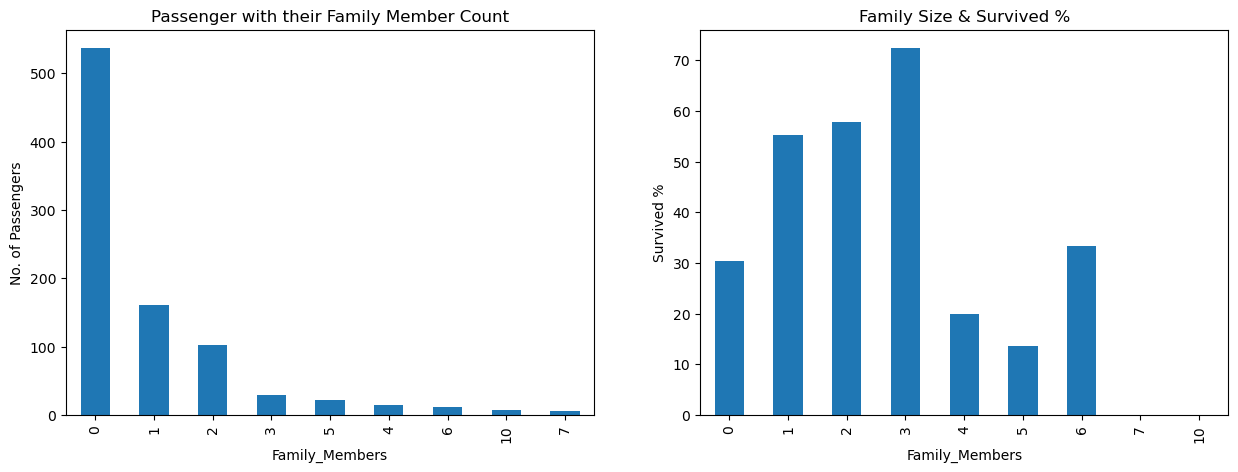

In [29]:
# Finding How many passenger with their siblings, spouse, parents

# Create the figure and subplots
plt.figure(figsize=(15, 5))

# First subplot: Family mebers value counts
plt.subplot(1, 2, 1)
df.Family_Members.value_counts().plot.bar()
plt.ylabel('No. of Passengers')
plt.title('Passenger with their Family Member Count')

# Family Member with survived rate
plt.subplot(1,2,2)
df_family['Survived_Percentage'].plot(kind= 'bar')
plt.ylabel('Survived %')
plt.title ('Family Size & Survived %')
plt.show()

- "0" means passenger was alone. Here those who alone they were high in number but their survived rate is very low compare to specialy those passenger who with 1 to 3 family member.
- But those passenger had more family member(>3), It is possible that they took longer to save each other's lives and were unable to save every member.

In [30]:
# Alone vs Family member

# passenger with their siblings, spouse count
df_alone= pd.crosstab (df['Family_Members'], df['Survived'])
df_alone.columns = ['Alone', 'With_Family']
df_alone
#

,Alone,With_Family
Family_Members,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [31]:
# passenger with their siblings, spouse count


In [32]:
df_family.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 10], dtype='int64', name='Family_Members')

In [33]:
df_alone_family= df_family.groupby('Family_Status')[['Dead','Survived']].sum()
df_alone_family['Survived_Percentage'] = round(df_alone_family['Survived']/ (df_alone_family['Survived']+df_alone_family['Dead'])*100,2)
df_alone_family.reset_index(inplace=True)
df_alone_family.rename(columns={'index': 'Family_Status'}, inplace=True)
df_alone_family

,Family_Status,Dead,Survived,Survived_Percentage
0,0,374,163,30.35
1,1,175,179,50.56


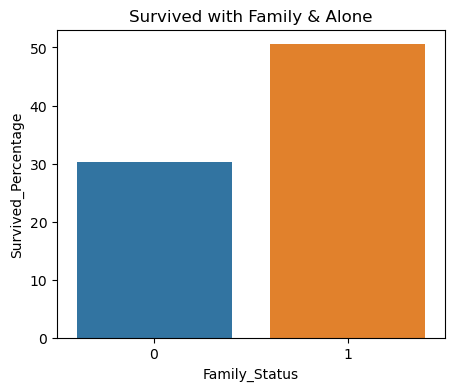

In [34]:
# 
plt.figure(figsize=(5,4))
sns.barplot(data=df_alone_family, x= 'Family_Status', y='Survived_Percentage')
plt.title('Survived with Family & Alone')
plt.show()

- Those passenger with the family member suurvived rate is high.
- Alone survived rate 30.35, With family survived rate is 50.56.

#### Fare

<Axes: >

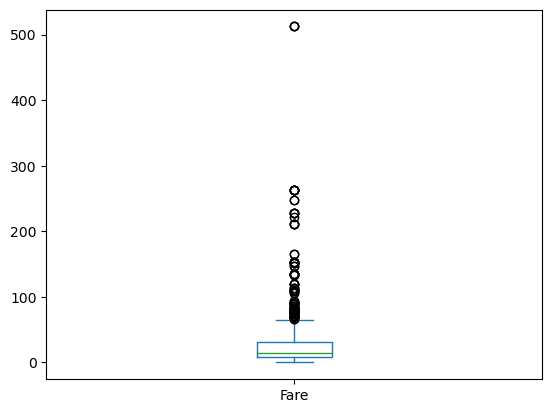

In [35]:
# Checking overall Fare rate

df.Fare.plot.box()

In [36]:
# Class wise average fare price
class_avg_price= df.groupby('Pclass')['Fare'].aggregate(['count', 'mean'])
class_avg_price

,count,mean
Pclass,,
1,216,84.154687
2,184,20.662183
3,491,13.675550


In [37]:
# Class wise Survived
df_Classwise_Survived= pd.crosstab(df['Pclass'], df['Survived'])
df_Classwise_Survived.columns= ['Dead', 'Survived']
df_Classwise_Survived['Percentage_Survived']= round(df_Classwise_Survived['Survived']/ (df_Classwise_Survived['Survived']+ df_Classwise_Survived['Dead'])*100,2)
df_Classwise_Survived.reset_index()

,Pclass,Dead,Survived,Percentage_Survived
0,1,80,136,62.96
1,2,97,87,47.28
2,3,372,119,24.24


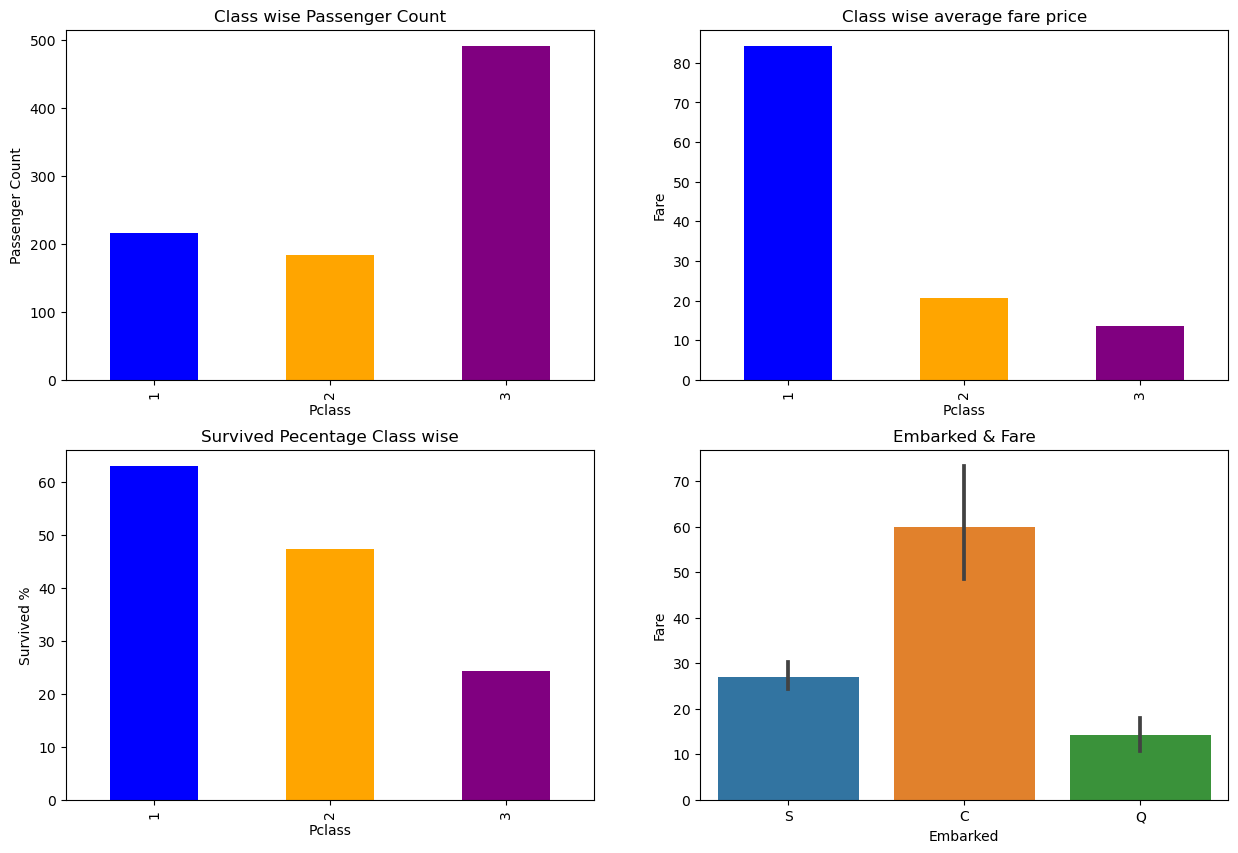

In [38]:
# Class wise passenger count and Fare
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
colors =['blue', 'orange', 'purple']
class_avg_price['count'].plot.bar(color=colors)
plt.title('Class wise Passenger Count')
plt.ylabel('Passenger Count')

plt.subplot(2,2,2)
class_avg_price['mean'].plot.bar(color=colors)
plt.title('Class wise average fare price')
plt.ylabel('Fare')

plt.subplot(2,2,3)
colors= ['blue', 'orange', 'purple']
df_Classwise_Survived['Percentage_Survived'].plot.bar(color=colors)
plt.ylabel('Survived %')
plt.title('Survived Pecentage Class wise')

plt.subplot(2,2,4)
sns.barplot(data=df, x='Embarked', y= 'Fare' )
plt.ylabel('Fare')
plt.title('Embarked & Fare')


plt.show()

- Class 3, indicating it had the most passengers, followed by class 1, and then class 2.
- Passengers in class 1 paid the highest average fare, while class 3 passengers paid the lowest.
- Those passeneger from PClass 1 class category, they are very few numbers but they paid higher & their survived rate is very high compare to to other classes. In first glance it shows that while rescueing passenger the priority given by Pclass wise. 
- Passengers who embarked from Cherbourg ('C') paid the highest average fares, while those from Queenstown ('Q') paid the least.

#### Embarked

In [39]:
# embarked Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [40]:
Embarked_count = df.groupby ('Embarked')['PassengerId'].count()
print (Embarked_count)

Embarked
C    169
Q     78
S    644
Name: PassengerId, dtype: int64


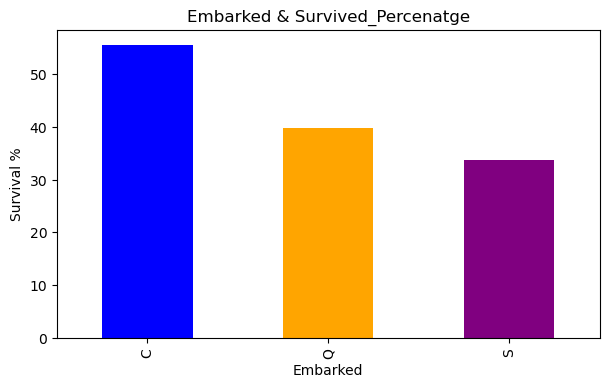

In [51]:
# Embarked wise survival reate
embarked_survival = pd.crosstab(df['Embarked'], df['Survived'])
embarked_survival.columns = ['Dead', 'Survived']
embarked_survival['Survived_Percenatge'] = round(embarked_survival['Survived']/ (embarked_survival['Dead']+embarked_survival['Survived'])*100,2)
plt.figure(figsize=(7,4))
colors= ['blue', 'orange', 'purple']
embarked_survival['Survived_Percenatge'].plot.bar(color= colors)
plt.ylabel('Survival %')
plt.title('Embarked & Survived_Percenatge')
plt.show()

- Those who embarked on Cherbourg they had high survived rate compare to others

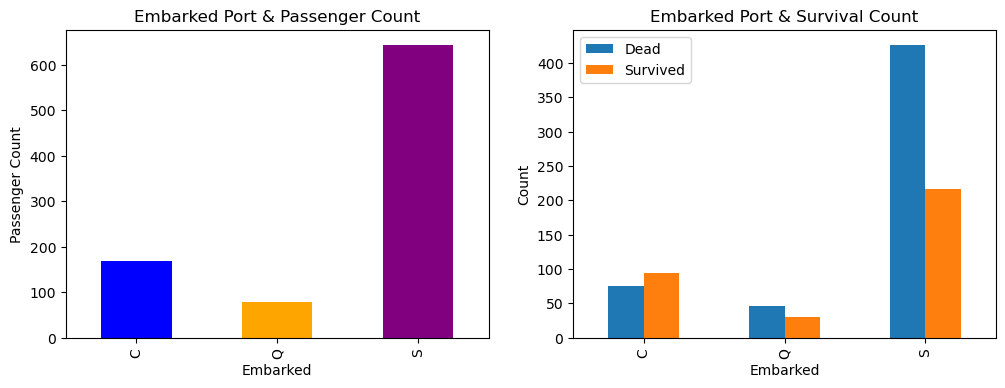

In [55]:
plt.figure(figsize=(12, 4))

# Embarked Port & Passenger Count
plt.subplot(1, 2, 1)
df.groupby('Embarked')['PassengerId'].count().plot.bar(color=colors)
plt.title('Embarked Port & Passenger Count')
plt.ylabel('Passenger Count')

#  Embarked Port & Survival Count
plt.subplot(1, 2, 2)
embarked_survival = pd.crosstab(df['Embarked'], df['Survived'])
embarked_survival.columns = ['Dead', 'Survived']
embarked_survival.plot.bar(ax=plt.gca())  # Specify the current axes for the plot
plt.title('Embarked Port & Survival Count')
plt.ylabel('Count')

plt.show()

- A large number of passengers embarked at Southampton. 

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
